## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ)
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import catboost


from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix


In [121]:
df = pd.read_csv('./data/telecom_users.csv')

In [122]:
df = df[df.columns[2:]]

In [123]:
df = df[df['TotalCharges'] != ' ']

In [124]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [125]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [126]:
Y = df['Churn'].copy()

In [127]:
df = df.drop('Churn', axis=1)

In [128]:
df.select_dtypes(include=['object']).nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
dtype: int64

In [129]:
cat_columns = df.select_dtypes(include=['object']).columns
num_columns = df.select_dtypes(include=['number']).columns

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
df_main = pd.get_dummies(df, prefix=cat_columns)

In [132]:
df_main

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,72,24.10,1734.65,0,1,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
1,0,44,88.15,3973.20,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,1,38,74.95,2869.85,1,0,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0
3,0,4,55.90,238.50,0,1,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
4,0,2,53.45,119.50,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,1,95.00,95.00,0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
5982,0,23,91.10,2198.30,1,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
5983,0,12,21.15,306.05,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
5984,1,12,99.45,1200.15,0,1,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0


In [144]:
sc = StandardScaler()

In [134]:
df_main[num_columns] = sc.fit_transform(df[num_columns])

In [136]:
df_main.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439106,1.611381,-1.353483,-0.247769,0,1,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
1,-0.439106,0.468468,0.774066,0.736669,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,2.277353,0.223558,0.335602,0.251453,1,0,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0
3,-0.439106,-1.164265,-0.297182,-0.905725,0,1,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
4,-0.439106,-1.245901,-0.378564,-0.958057,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0


In [138]:
df_main.columns = map(lambda x: x.lower(), df_main.columns)

In [139]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50


In [137]:
Y.value_counts()

0    4389
1    1587
Name: Churn, dtype: int64

In [141]:
x_train, x_test, y_train, y_test = train_test_split(df_main, Y, test_size=0.3, random_state=42, stratify=Y)

In [146]:
log_reg = LogisticRegression(random_state=42)

In [147]:
log_reg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [148]:
y_pred = log_reg.predict(x_test)

In [150]:
accuracy_score(y_test, y_pred)

0.8014500836586727

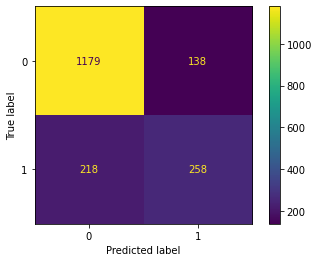

In [153]:
plot_confusion_matrix(log_reg, x_test, y_test)
plt.show()

In [174]:
def eval_model(model, x_test, y_test):
    print('Accurace score: {}'.format(accuracy_score(
        y_test, y_pred
    )))
    print('Точность: {}'.format(precision_score(y_test, model.predict(x_test))))
    print('Полнота: {}'.format(recall_score(y_test, model.predict(x_test))))
    print('F1 Score: {}'.format(f1_score(y_test, model.predict(x_test))))
    plot_confusion_matrix(model, x_test, y_test)
    plot_roc_curve(model, x_test, y_test)
    plt.show()

Accurace score: 0.7373117679866146
Точность: 0.6515151515151515
Полнота: 0.542016806722689
F1 Score: 0.5917431192660549


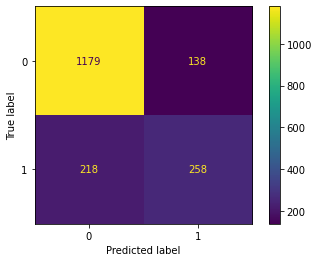

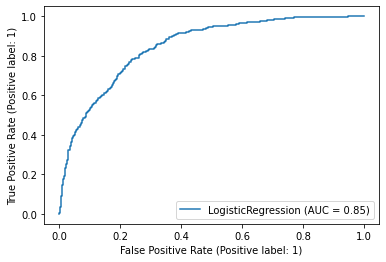

In [175]:
eval_model(log_reg, x_test, y_test)

In [176]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

Accurace score: 0.7373117679866146
Точность: 0.5051975051975052
Полнота: 0.5105042016806722
F1 Score: 0.5078369905956114


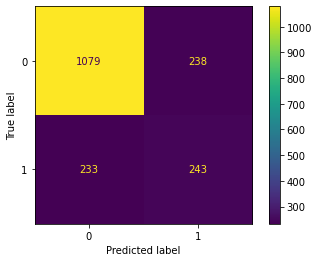

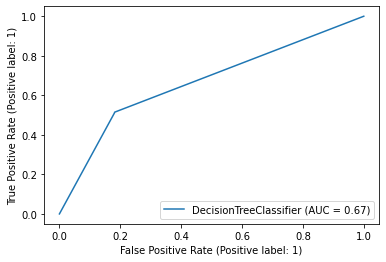

In [177]:
eval_model(dtc, x_test, y_test)

Accurace score: 0.7373117679866146
Точность: 0.6461988304093568
Полнота: 0.4642857142857143
F1 Score: 0.5403422982885085


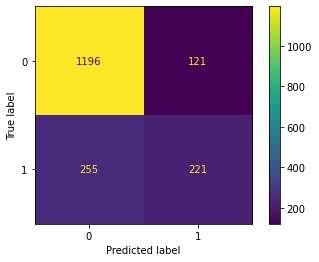

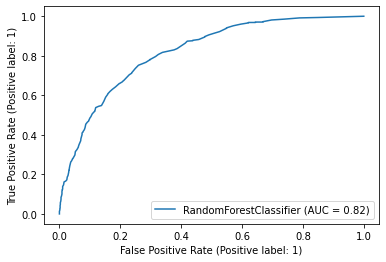

In [178]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)
eval_model(rfc, x_test, y_test)